In [203]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from math import sqrt

In [204]:
def exp(tau):
    return -tau*np.log(1-np.random.uniform())

In [205]:
def pdf(N,t0):
    return np.array([exp(t0) for i in range(N)])

In [206]:
def max(sample):
    m=sample[0]
    for i in sample:
        if i > m: m = i
    return m

def min(sample):
    m=sample[0]
    for i in sample:
        if i < m: m = i
    return m

In [207]:
def max2(sample,func,t):

    m = func(sample,t[0])
    index = t[0]
    
    for i in t:

        t1 = func(sample,i)

        if t1 > m:
            m = t1
            index = i

    return m,index

In [208]:
def mergeSort(arr):
    if len(arr) > 1:
 
         # Finding the mid of the array
        mid = len(arr)//2
 
        # Dividing the array elements
        L = arr[:mid]
 
        # Into 2 halves
        R = arr[mid:]
 
        # Sorting the first half
        mergeSort(L)
 
        # Sorting the second half
        mergeSort(R)
 
        i = j = k = 0
 
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

Plotting the exponentially distributed data

(array([575., 250., 103.,  40.,  21.,   6.,   2.,   2.,   0.,   1.]),
 array([1.01697916e-02, 4.31116652e+00, 8.61216324e+00, 1.29131600e+01,
        1.72141567e+01, 2.15151534e+01, 2.58161501e+01, 3.01171469e+01,
        3.44181436e+01, 3.87191403e+01, 4.30201370e+01]),
 <BarContainer object of 10 artists>)

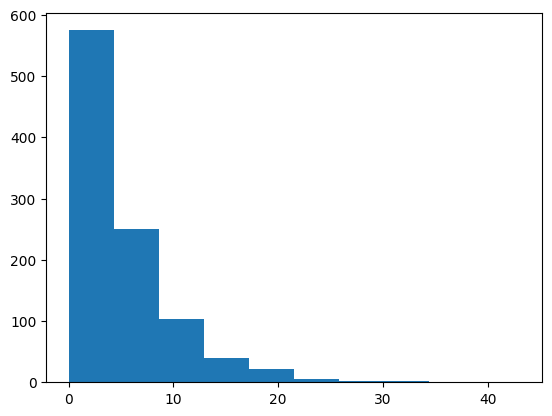

In [209]:
N = 1000
t0 = 5

dati = pdf(N,t0)


plt.hist(dati,bins=10)

Comparing likelihoods with different data sizes

In [210]:
def likelihood(dati,t):
    return np.prod([np.exp(-i/t)/t for i in dati])

In [211]:
def loglikelihood(dati,t):
    return np.sum([np.log(np.exp(-i/t)/t) for i in dati])

In [212]:
t_range = np.linspace(1,100,1000) #range of t0 values

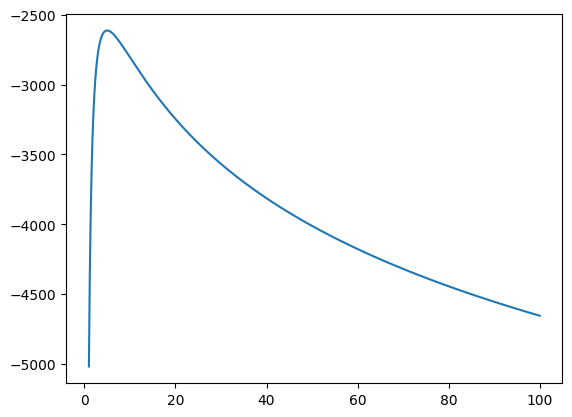

In [213]:
logLike = [loglikelihood(dati,t) for t in t_range]

plt.plot(t_range,logLike)

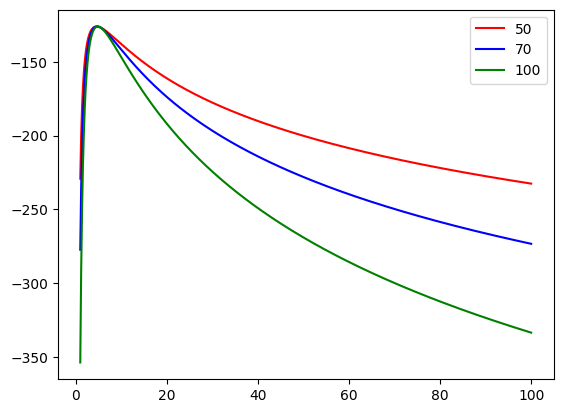

In [214]:
like1 = [loglikelihood(dati[:50],t) for t in t_range]
like2 = [loglikelihood(dati[:70],t) for t in t_range]
like3 = [loglikelihood(dati[:100],t) for t in t_range]

m1 = max(like1)
m2 = m1-max(like2)
m3 = m1-max(like3)

like2 = [i+m2 for i in like2]
like3 = [i+m3 for i in like3]

plt.plot(t_range,like1,c='red',label=50)
plt.plot(t_range,like2,c='blue',label=70)
plt.plot(t_range,like3,c='green',label=100)
plt.legend()

In [215]:
def zeros(dati, range, prec = .0001):
    
    m = min(range)
    M = max(range)
    
    mid = (M-m)/2

    while(abs(M-m) < prec):

        m = min(range)
        M = max(range)
        mid = (M-m)/2

        if(loglikelihood(dati,mid)*loglikelihood(dati,m) > 0): m = mid

        else: M = mid

    return mid

4.5


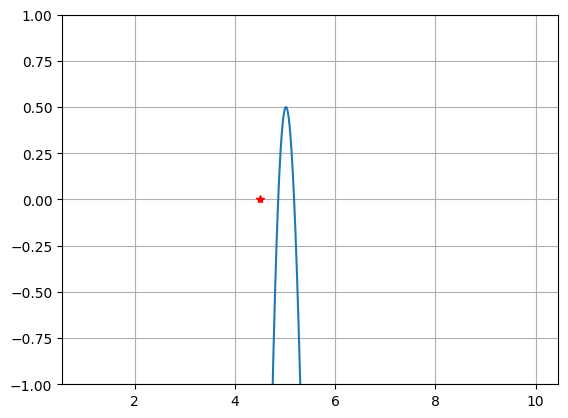

In [218]:
t_range = np.linspace(1,10,1000) #range of t0 values

y_max,x_max = max2(dati,loglikelihood,t_range)

l = [loglikelihood(dati,t)-y_max+0.5 for t in t_range]

print(zeros(dati,t_range))

plt.plot(t_range,l)
plt.plot(zeros(dati,t_range),0,marker = '*',c='red')
plt.ylim(-1,1)
plt.grid(True)